In [1]:
import scanpy as sc
import cyclum.tuning
import cyclum.models
import copy
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import keras
import keras.backend
from cyclum import writer
import numpy
import numpy as np
import pandas as pd
import seaborn as sns

adata_pos = sc.read("adata_pos.h5ad")
adata_neg = sc.read("adata_neg.h5ad")

In [2]:
for i in range(1,12):
    tmp_layer =0
    tmp_score =0
    model = cyclum.tuning.CyclumAutoTune(adata_neg.X, max_linear_dims=i, epochs=500, rate=2e-4, verbose=100,                                     encoder_width=[20, 30])
    model.train(adata_neg.X, epochs=1000, verbose=100, rate=2e-4)
    bdata_neg= copy.deepcopy(adata_neg)
    pseudotime = model.predict_pseudotime(adata_neg.X)
    circular_comp = model.get_circular_component(pseudotime)
    noncircular_comp = bdata_neg.X - circular_comp
    bdata_neg.X = noncircular_comp
    model = cyclum.tuning.CyclumAutoTune(adata_pos.X, max_linear_dims=i,
                                         epochs=500, rate=2e-4, verbose=100,
                                         encoder_width=[20, 30])#30,20
    model.train(adata_pos.X, epochs=1000, verbose=100, rate=2e-4)
    bdata_pos= copy.deepcopy(adata_pos)
    pseudotime = model.predict_pseudotime(adata_pos.X)
    circular_comp = model.get_circular_component(pseudotime)
    noncircular_comp = bdata_pos.X - circular_comp
    bdata_pos.X = noncircular_comp
    bdata_unit = bdata_neg.concatenate(bdata_pos)
    labels_str = bdata_unit.obs["FE"]
    #sc.tl.pca(bdata_unit)
    #sc.pl.pca_scatter(bdata_unit, color='FE')
    score = silhouette_score(bdata_unit.X, labels_str)
    if score>tmp_score:
        tmp_score=score
        tmp_layer=i


Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...


2022-02-09 18:28:28.918701: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


epoch: 100/500, loss:  0.0897, time elapsed:  65.51s, time left:  262.03s
epoch: 200/500, loss:  0.0743, time elapsed:  131.26s, time left:  196.88s
epoch: 300/500, loss:  0.0727, time elapsed:  196.76s, time left:  131.17s
epoch: 400/500, loss:  0.0726, time elapsed:  261.96s, time left:  65.49s
epoch: 500/500, loss:  0.0725, time elapsed:  325.49s, time left:  0.00s
[0.07252553105354309]
[0.19119805, 0.18977576, 0.18902616]
    1 linear dimensions...
epoch: 100/500, loss:  0.0719, time elapsed:  69.20s, time left:  276.80s
epoch: 200/500, loss:  0.0718, time elapsed:  135.27s, time left:  202.91s
epoch: 300/500, loss:  0.0718, time elapsed:  202.04s, time left:  134.69s
epoch: 400/500, loss:  0.0717, time elapsed:  268.93s, time left:  67.23s
epoch: 500/500, loss:  0.0718, time elapsed:  334.66s, time left:  0.00s
[0.07252553105354309, 0.07176900655031204]
[0.19119805, 0.18977576, 0.18902616]
Have not found one. Suggest raise max_linear_dims. Use 1 linear components...
epoch: 100/100

epoch: 900/1000, loss:  0.0726, time elapsed:  641.21s, time left:  71.25s
epoch: 1000/1000, loss:  0.0726, time elapsed:  706.62s, time left:  0.00s
Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...
epoch: 100/500, loss:  0.0897, time elapsed:  57.60s, time left:  230.40s
epoch: 200/500, loss:  0.0739, time elapsed:  115.10s, time left:  172.65s
epoch: 300/500, loss:  0.0726, time elapsed:  171.33s, time left:  114.22s
epoch: 400/500, loss:  0.0726, time elapsed:  228.63s, time left:  57.16s
epoch: 500/500, loss:  0.0725, time elapsed:  284.96s, time left:  0.00s
[0.07252982258796692]
[0.19119805, 0.18977576, 0.18902616, 0.18850718, 0.18806647]
    1 linear dimensions...
epoch: 100/500, loss:  0.0719, time elapsed:  69.46s, time left:  277.85s
epoch: 200/500, loss:  0.0718, time elapsed:  149.37s, time left:  224.05s
epoch: 300/500, loss:  0.0717, time elapsed:  212.76s, time left:  141.84s
epoch: 400/500, loss:  0.071

epoch: 100/500, loss:  0.0700, time elapsed:  67.36s, time left:  269.43s
epoch: 200/500, loss:  0.0698, time elapsed:  134.82s, time left:  202.24s
epoch: 300/500, loss:  0.0697, time elapsed:  199.45s, time left:  132.97s
epoch: 400/500, loss:  0.0697, time elapsed:  264.27s, time left:  66.07s
epoch: 500/500, loss:  0.0697, time elapsed:  332.31s, time left:  0.00s
[0.07267852127552032, 0.07175888866186142, 0.07075551897287369, 0.07006698101758957, 0.06966525316238403]
[0.19119805, 0.18977578, 0.18902616, 0.18850718, 0.18806645, 0.1877197]
Have not found one. Suggest raise max_linear_dims. Use 4 linear components...
epoch: 100/1000, loss:  0.0700, time elapsed:  68.23s, time left:  614.07s
epoch: 200/1000, loss:  0.0698, time elapsed:  135.95s, time left:  543.81s
epoch: 300/1000, loss:  0.0697, time elapsed:  205.04s, time left:  478.43s
epoch: 400/1000, loss:  0.0697, time elapsed:  273.78s, time left:  410.67s
epoch: 500/1000, loss:  0.0696, time elapsed:  346.73s, time left:  34

epoch: 100/1000, loss:  0.0697, time elapsed:  71.53s, time left:  643.78s
epoch: 200/1000, loss:  0.0694, time elapsed:  141.48s, time left:  565.92s
epoch: 300/1000, loss:  0.0694, time elapsed:  212.10s, time left:  494.89s
epoch: 400/1000, loss:  0.0693, time elapsed:  282.11s, time left:  423.16s
epoch: 500/1000, loss:  0.0693, time elapsed:  352.19s, time left:  352.19s
epoch: 600/1000, loss:  0.0693, time elapsed:  422.02s, time left:  281.35s
epoch: 700/1000, loss:  0.0693, time elapsed:  492.04s, time left:  210.88s
epoch: 800/1000, loss:  0.0692, time elapsed:  561.67s, time left:  140.42s
epoch: 900/1000, loss:  0.0692, time elapsed:  632.18s, time left:  70.24s
epoch: 1000/1000, loss:  0.0692, time elapsed:  699.82s, time left:  0.00s
Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...
epoch: 100/500, loss:  0.0895, time elapsed:  56.50s, time left:  226.01s
epoch: 200/500, loss:  0.0749, time elapsed:  112.61

epoch: 500/500, loss:  0.0694, time elapsed:  340.03s, time left:  0.00s
[0.07266425341367722, 0.07174166291952133, 0.07081124186515808, 0.0700424537062645, 0.06962987035512924, 0.06936357915401459]
[0.19119805, 0.1897758, 0.18902616, 0.18850718, 0.18806647, 0.18771969, 0.18747136, 0.18726444]
    6 linear dimensions...
epoch: 100/500, loss:  0.0693, time elapsed:  71.36s, time left:  285.42s
epoch: 200/500, loss:  0.0691, time elapsed:  143.01s, time left:  214.52s
epoch: 300/500, loss:  0.0690, time elapsed:  215.12s, time left:  143.41s
epoch: 400/500, loss:  0.0690, time elapsed:  285.54s, time left:  71.39s
epoch: 500/500, loss:  0.0690, time elapsed:  356.22s, time left:  0.00s
[0.07266425341367722, 0.07174166291952133, 0.07081124186515808, 0.0700424537062645, 0.06962987035512924, 0.06936357915401459, 0.06900271773338318]
[0.19119805, 0.1897758, 0.18902616, 0.18850718, 0.18806647, 0.18771969, 0.18747136, 0.18726444]
Have not found one. Suggest raise max_linear_dims. Use 6 linear 

epoch: 500/500, loss:  0.0708, time elapsed:  323.80s, time left:  0.00s
[0.07267039269208908, 0.07175318151712418, 0.07075116038322449]
[0.19119805, 0.1897758, 0.18902616, 0.18850718, 0.18806648, 0.1877197, 0.18747136, 0.1872644, 0.18706608]
    3 linear dimensions...
epoch: 100/500, loss:  0.0703, time elapsed:  63.29s, time left:  253.15s
epoch: 200/500, loss:  0.0702, time elapsed:  128.08s, time left:  192.11s
epoch: 300/500, loss:  0.0701, time elapsed:  192.25s, time left:  128.17s
epoch: 400/500, loss:  0.0701, time elapsed:  255.23s, time left:  63.81s
epoch: 500/500, loss:  0.0701, time elapsed:  319.29s, time left:  0.00s
[0.07267039269208908, 0.07175318151712418, 0.07075116038322449, 0.07005598396062851]
[0.19119805, 0.1897758, 0.18902616, 0.18850718, 0.18806648, 0.1877197, 0.18747136, 0.1872644, 0.18706608]
    4 linear dimensions...
epoch: 100/500, loss:  0.0700, time elapsed:  64.97s, time left:  259.87s
epoch: 200/500, loss:  0.0698, time elapsed:  131.89s, time left:  

epoch: 100/500, loss:  0.0714, time elapsed:  69.84s, time left:  279.35s
epoch: 200/500, loss:  0.0712, time elapsed:  139.38s, time left:  209.07s
epoch: 300/500, loss:  0.0711, time elapsed:  208.07s, time left:  138.71s
epoch: 400/500, loss:  0.0711, time elapsed:  277.43s, time left:  69.36s
epoch: 500/500, loss:  0.0711, time elapsed:  348.58s, time left:  0.00s
[0.07393042743206024, 0.07325214892625809, 0.07260087877511978, 0.07208943367004395, 0.07177430391311646, 0.07152042537927628, 0.0712754875421524, 0.07114653289318085]
[0.21587214, 0.21497232, 0.21439813, 0.21394698, 0.21365015, 0.21337657, 0.21314631, 0.21294916, 0.2127852]
Have not found one. Suggest raise max_linear_dims. Use 7 linear components...
epoch: 100/1000, loss:  0.0715, time elapsed:  69.36s, time left:  624.24s
epoch: 200/1000, loss:  0.0712, time elapsed:  139.04s, time left:  556.17s
epoch: 300/1000, loss:  0.0712, time elapsed:  208.70s, time left:  486.96s
epoch: 400/1000, loss:  0.0711, time elapsed:  2

epoch: 200/500, loss:  0.0749, time elapsed:  110.02s, time left:  165.03s
epoch: 300/500, loss:  0.0741, time elapsed:  165.13s, time left:  110.09s
epoch: 400/500, loss:  0.0740, time elapsed:  219.89s, time left:  54.97s
epoch: 500/500, loss:  0.0739, time elapsed:  274.63s, time left:  0.00s
[0.07392042875289917]
[0.21587214, 0.21497232, 0.21439815, 0.21394698, 0.21365014, 0.21337658, 0.21314634, 0.21294923, 0.21278521, 0.21264656]
    1 linear dimensions...
epoch: 100/500, loss:  0.0734, time elapsed:  62.99s, time left:  251.94s
epoch: 200/500, loss:  0.0733, time elapsed:  126.11s, time left:  189.17s
epoch: 300/500, loss:  0.0733, time elapsed:  189.76s, time left:  126.50s
epoch: 400/500, loss:  0.0733, time elapsed:  252.74s, time left:  63.18s
epoch: 500/500, loss:  0.0733, time elapsed:  316.37s, time left:  0.00s
[0.07392042875289917, 0.0732506513595581]
[0.21587214, 0.21497232, 0.21439815, 0.21394698, 0.21365014, 0.21337658, 0.21314634, 0.21294923, 0.21278521, 0.21264656]

epoch: 200/500, loss:  0.0702, time elapsed:  127.77s, time left:  191.65s
epoch: 300/500, loss:  0.0701, time elapsed:  190.55s, time left:  127.03s
epoch: 400/500, loss:  0.0701, time elapsed:  253.94s, time left:  63.48s
epoch: 500/500, loss:  0.0701, time elapsed:  317.57s, time left:  0.00s
[0.07253682613372803, 0.07176098972558975, 0.07075978070497513, 0.07007123529911041]
[0.19119805, 0.1897758, 0.18902616, 0.18850718, 0.18806647, 0.18771969, 0.18747135, 0.18726437, 0.18706611, 0.18687868, 0.18671605]
    4 linear dimensions...
epoch: 100/500, loss:  0.0699, time elapsed:  65.10s, time left:  260.39s
epoch: 200/500, loss:  0.0698, time elapsed:  130.46s, time left:  195.70s
epoch: 300/500, loss:  0.0697, time elapsed:  193.72s, time left:  129.15s
epoch: 400/500, loss:  0.0697, time elapsed:  259.39s, time left:  64.85s
epoch: 500/500, loss:  0.0697, time elapsed:  323.39s, time left:  0.00s
[0.07253682613372803, 0.07176098972558975, 0.07075978070497513, 0.07007123529911041, 0.0

epoch: 500/500, loss:  0.0718, time elapsed:  333.34s, time left:  0.00s
[0.07392063736915588, 0.07326113432645798, 0.07262635231018066, 0.07207905501127243, 0.0717913955450058]
[0.21587214, 0.21497232, 0.21439813, 0.21394701, 0.21365015, 0.21337658, 0.2131463, 0.21294919, 0.21278512, 0.21264458, 0.21251532]
    5 linear dimensions...
epoch: 100/500, loss:  0.0719, time elapsed:  69.97s, time left:  279.86s
epoch: 200/500, loss:  0.0716, time elapsed:  138.46s, time left:  207.69s
epoch: 300/500, loss:  0.0716, time elapsed:  207.09s, time left:  138.06s
epoch: 400/500, loss:  0.0715, time elapsed:  275.74s, time left:  68.93s
epoch: 500/500, loss:  0.0715, time elapsed:  344.01s, time left:  0.00s
[0.07392063736915588, 0.07326113432645798, 0.07262635231018066, 0.07207905501127243, 0.0717913955450058, 0.07150320708751678]
[0.21587214, 0.21497232, 0.21439813, 0.21394701, 0.21365015, 0.21337658, 0.2131463, 0.21294919, 0.21278512, 0.21264458, 0.21251532]
    6 linear dimensions...
epoch: 

epoch: 100/500, loss:  0.0693, time elapsed:  68.33s, time left:  273.33s
epoch: 200/500, loss:  0.0691, time elapsed:  141.78s, time left:  212.67s
epoch: 300/500, loss:  0.0690, time elapsed:  238.32s, time left:  158.88s
epoch: 400/500, loss:  0.0690, time elapsed:  317.72s, time left:  79.43s
epoch: 500/500, loss:  0.0690, time elapsed:  390.21s, time left:  0.00s
[0.07269152998924255, 0.07174690067768097, 0.07075058668851852, 0.07006453722715378, 0.06972304731607437, 0.06936231255531311, 0.06899131089448929]
[0.19119805, 0.18977578, 0.18902616, 0.18850718, 0.18806647, 0.1877197, 0.18747137, 0.1872644, 0.18706606, 0.18687865, 0.18671475, 0.18656553]
    7 linear dimensions...
epoch: 100/500, loss:  0.0691, time elapsed:  69.25s, time left:  276.99s
epoch: 200/500, loss:  0.0689, time elapsed:  156.31s, time left:  234.47s
epoch: 300/500, loss:  0.0688, time elapsed:  232.67s, time left:  155.11s
epoch: 400/500, loss:  0.0688, time elapsed:  323.07s, time left:  80.77s
epoch: 500/50

epoch: 100/500, loss:  0.0716, time elapsed:  77.85s, time left:  311.41s
epoch: 200/500, loss:  0.0714, time elapsed:  154.85s, time left:  232.27s
epoch: 300/500, loss:  0.0713, time elapsed:  231.41s, time left:  154.27s
epoch: 400/500, loss:  0.0713, time elapsed:  307.75s, time left:  76.94s
epoch: 500/500, loss:  0.0713, time elapsed:  383.17s, time left:  0.00s
[0.07391055673360825, 0.07325541973114014, 0.07263515889644623, 0.0721028596162796, 0.07179379463195801, 0.07158248871564865, 0.07129841297864914]
[0.21587214, 0.21497232, 0.21439813, 0.21394698, 0.21365015, 0.21337658, 0.2131463, 0.21294916, 0.21278489, 0.21264543, 0.21251668, 0.2123958]
    7 linear dimensions...
epoch: 100/500, loss:  0.0714, time elapsed:  78.75s, time left:  315.00s
epoch: 200/500, loss:  0.0712, time elapsed:  157.25s, time left:  235.87s
epoch: 300/500, loss:  0.0711, time elapsed:  234.58s, time left:  156.39s
epoch: 400/500, loss:  0.0711, time elapsed:  312.09s, time left:  78.02s
epoch: 500/500

epoch: 100/500, loss:  0.0693, time elapsed:  79.05s, time left:  316.21s
epoch: 200/500, loss:  0.0691, time elapsed:  156.92s, time left:  235.38s
epoch: 300/500, loss:  0.0691, time elapsed:  235.35s, time left:  156.90s
epoch: 400/500, loss:  0.0691, time elapsed:  314.16s, time left:  78.54s
epoch: 500/500, loss:  0.0690, time elapsed:  391.83s, time left:  0.00s
[0.07252421230077744, 0.07174636423587799, 0.07076923549175262, 0.07007119059562683, 0.06962618231773376, 0.06925605982542038, 0.06903348118066788]
[0.19119805, 0.1897758, 0.18902616, 0.18850718, 0.18806647, 0.1877197, 0.18747136, 0.1872644, 0.18706605, 0.18687865, 0.18671481, 0.18656558, 0.18642579]
    7 linear dimensions...
epoch: 100/500, loss:  0.0691, time elapsed:  79.38s, time left:  317.53s
epoch: 200/500, loss:  0.0689, time elapsed:  159.65s, time left:  239.48s
epoch: 300/500, loss:  0.0688, time elapsed:  238.84s, time left:  159.23s
epoch: 400/500, loss:  0.0688, time elapsed:  318.65s, time left:  79.66s
ep

epoch: 100/500, loss:  0.0718, time elapsed:  77.85s, time left:  311.39s
epoch: 200/500, loss:  0.0716, time elapsed:  160.88s, time left:  241.31s
epoch: 300/500, loss:  0.0715, time elapsed:  246.93s, time left:  164.62s
epoch: 400/500, loss:  0.0715, time elapsed:  328.78s, time left:  82.20s
epoch: 500/500, loss:  0.0715, time elapsed:  407.57s, time left:  0.00s
[0.07391829788684845, 0.07327618449926376, 0.07260002940893173, 0.07209182530641556, 0.07178943604230881, 0.07148125022649765]
[0.21587214, 0.21497232, 0.21439813, 0.21394698, 0.21365014, 0.21337657, 0.21314631, 0.21294916, 0.21278496, 0.21264485, 0.21251675, 0.2123946, 0.2122857]
    6 linear dimensions...
epoch: 100/500, loss:  0.0716, time elapsed:  119.95s, time left:  479.82s
epoch: 200/500, loss:  0.0714, time elapsed:  219.34s, time left:  329.00s
epoch: 300/500, loss:  0.0714, time elapsed:  308.01s, time left:  205.34s
epoch: 400/500, loss:  0.0713, time elapsed:  384.10s, time left:  96.02s
epoch: 500/500, loss:

Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...
epoch: 100/500, loss:  0.0897, time elapsed:  69.76s, time left:  279.05s
epoch: 200/500, loss:  0.0747, time elapsed:  143.98s, time left:  215.98s
epoch: 300/500, loss:  0.0728, time elapsed:  231.34s, time left:  154.23s
epoch: 400/500, loss:  0.0727, time elapsed:  323.62s, time left:  80.90s
epoch: 500/500, loss:  0.0727, time elapsed:  403.23s, time left:  0.00s
[0.0726771429181099]
[0.19119805, 0.1897758, 0.18902616, 0.18850718, 0.18806647, 0.18771969, 0.18747135, 0.18726438, 0.18706605, 0.18687865, 0.18671484, 0.1865662, 0.18642737]
    1 linear dimensions...
epoch: 100/500, loss:  0.0719, time elapsed:  102.35s, time left:  409.39s
epoch: 200/500, loss:  0.0718, time elapsed:  224.46s, time left:  336.69s
epoch: 300/500, loss:  0.0717, time elapsed:  345.14s, time left:  230.09s
epoch: 400/500, loss:  0.0717, time elapsed:  474.19s, time left:  118.55s
epoch: 50

epoch: 100/1000, loss:  0.0686, time elapsed:  104.41s, time left:  939.72s
epoch: 200/1000, loss:  0.0683, time elapsed:  203.60s, time left:  814.39s
epoch: 300/1000, loss:  0.0683, time elapsed:  295.51s, time left:  689.51s
epoch: 400/1000, loss:  0.0682, time elapsed:  385.88s, time left:  578.82s
epoch: 500/1000, loss:  0.0681, time elapsed:  484.81s, time left:  484.81s
epoch: 600/1000, loss:  0.0681, time elapsed:  596.96s, time left:  397.97s
epoch: 700/1000, loss:  0.0681, time elapsed:  713.04s, time left:  305.59s
epoch: 800/1000, loss:  0.0681, time elapsed:  808.04s, time left:  202.01s
epoch: 900/1000, loss:  0.0681, time elapsed:  908.52s, time left:  100.95s
epoch: 1000/1000, loss:  0.0681, time elapsed:  1027.26s, time left:  0.00s
Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...
epoch: 100/500, loss:  0.0896, time elapsed:  72.05s, time left:  288.20s
epoch: 200/500, loss:  0.0749, time elapsed:  162

epoch: 100/500, loss:  0.0711, time elapsed:  171.58s, time left:  686.31s
epoch: 200/500, loss:  0.0707, time elapsed:  339.45s, time left:  509.18s
epoch: 300/500, loss:  0.0706, time elapsed:  481.84s, time left:  321.23s
epoch: 400/500, loss:  0.0705, time elapsed:  629.00s, time left:  157.25s
epoch: 500/500, loss:  0.0706, time elapsed:  772.27s, time left:  0.00s
[0.07393567264080048, 0.07325393706560135, 0.0725950226187706, 0.0720895305275917, 0.07181531935930252, 0.0715121328830719, 0.07127215713262558, 0.07109326124191284, 0.07092587649822235, 0.07079809904098511, 0.07072830200195312, 0.07056591659784317]
[0.21587214, 0.21497232, 0.21439813, 0.21394698, 0.21365014, 0.21337658, 0.21314631, 0.21294917, 0.21278502, 0.21264459, 0.21252018, 0.21239805, 0.21228461]
Have not found one. Suggest raise max_linear_dims. Use 11 linear components...
epoch: 100/1000, loss:  0.0711, time elapsed:  146.40s, time left:  1317.58s
epoch: 200/1000, loss:  0.0707, time elapsed:  290.64s, time lef

/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical


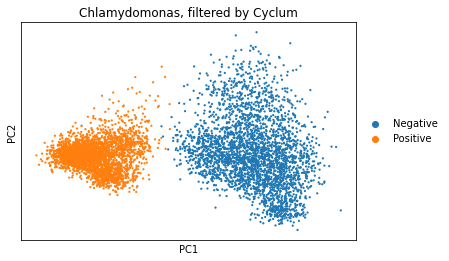

silhoutte score  : 0.052647643
davies_bouldin_score: 4.183736847026744
calinski_harabasz_score: 337.6291963490118


In [3]:
model = cyclum.tuning.CyclumAutoTune(adata_neg.X, max_linear_dims=tmp_layer, epochs=500, rate=2e-4, verbose=100,                                     encoder_width=[20, 30])
model.train(adata_neg.X, epochs=1000, verbose=100, rate=2e-4)
bdata_neg= copy.deepcopy(adata_neg)
pseudotime = model.predict_pseudotime(adata_neg.X)
circular_comp = model.get_circular_component(pseudotime)
noncircular_comp = bdata_neg.X - circular_comp
bdata_neg.X = noncircular_comp
model = cyclum.tuning.CyclumAutoTune(adata_pos.X, max_linear_dims=tmp_layer,
                                         epochs=500, rate=2e-4, verbose=100,                                         encoder_width=[20, 30])#30,20
model.train(adata_pos.X, epochs=1000, verbose=100, rate=2e-4)
bdata_pos= copy.deepcopy(adata_pos)
pseudotime = model.predict_pseudotime(adata_pos.X)
circular_comp = model.get_circular_component(pseudotime)
noncircular_comp = bdata_pos.X - circular_comp
bdata_pos.X = noncircular_comp
bdata_unit = bdata_neg.concatenate(bdata_pos)
labels_str = bdata_unit.obs["FE"]
sc.tl.pca(bdata_unit)
sc.pl.pca_scatter(bdata_unit, color='FE' , title='Chlamydomonas, filtered by Cyclum')
print("silhoutte score  : " +str(silhouette_score(bdata_unit.X,labels_str)))
print("davies_bouldin_score: "+str(davies_bouldin_score(bdata_unit.X,labels_str)))
print("calinski_harabasz_score: "+str(calinski_harabasz_score(bdata_unit.X,labels_str)))

